In [1]:
library("factoextra")
options(repr.plot.width=12, repr.plot.height=13)

Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


In [2]:
path="C:/Users/Jordi/New_Jupyter/"
setwd(path)
mydata = read.csv("threads_ideal_data_partial_sp_cl+listR.csv", sep=";")
unique(mydata[,"comp_opt"])

[1] O2
Levels: O2

In [3]:
colnames(mydata)

[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "time_x"       "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN" 
[16] "PAPI_BR_MSP"  "time_y"       "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM" 
[21] "time_x.1"     "PAPI_SP_OPS"  "PAPI_LD_INS"  "PAPI_L2_STM"  "time_y.1"    
[26] "PAPI_TLB_DM"  "PAPI_L2_DCH"  "time"         "time_log"     "P_index"     
[31] "ideal"        "affinity"     "T_list"       "P_list"

In [4]:
library(stringr)
colnames(mydata)<-gsub(x = names(mydata), pattern = "\\.", replacement = "_" )

In [5]:
#colnames(mydata)

In [6]:
mydata = mydata[mydata$affinity == 'spread',]

mydata_no_time <- subset(mydata, select = -c(P_list))
mydata_no_time <- subset(mydata_no_time, select = -c(T_list))
mydata_no_time <- subset(mydata_no_time, select = -c(ideal))
mydata_no_time <- subset(mydata_no_time, select = -c(P_index))
mydata_no_time <- subset(mydata_no_time, select = -c(time_log))
mydata_no_time <- subset(mydata_no_time, select = -c(time))
mydata_no_time <- subset(mydata_no_time, select = -c(time_y_1))
mydata_no_time <- subset(mydata_no_time, select = -c(time_x_1))
mydata_no_time <- subset(mydata_no_time, select = -c(time_x))
mydata_no_time <- subset(mydata_no_time, select = -c(time_y))
mydata_no_time <- subset(mydata_no_time, select = -c(affinity))




mydata_no_time <- subset(mydata_no_time, select = -c(PAPI_SP_OPS))



In [7]:
colnames(mydata_no_time)

[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[16] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[21] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [8]:
#mydata = mydata[mydata$comp_opt != 'NF',]
#mydata = mydata[mydata$comp_opt != 'O1',]
#mydata = mydata[mydata$label != '2D4PStencil_E',]
#mydata = mydata[mydata$label != 'Reduction_E',]
#mydata = mydata[mydata$label != '2PStencil_E',]

#head(mydata)
#unique(mydata[,"comp_opt"])

In [9]:
#head(mydata)

In [10]:
dfu <- unique(mydata_no_time$size_vector)
#dfu[order(dfu)]

comprss <- function(tx) { 
      div <- findInterval(as.numeric(gsub("\\,", "", tx)), 
                          c(1, 1e3, 1e6, 1e9, 1e12) )
      paste(round( as.numeric(gsub("\\,","",tx))/10^(3*(div-1)), 2), 
           c("","K","M","B","T")[div] )}
comprss(dfu[order(dfu)])



[1] "1 K"   "2 K"   "3 K"   "4 K"   "5 K"   "6 K"   "7 K"   "8 K"   "9 K"  
[10] "10 K"  "20 K"  "30 K"  "40 K"  "50 K"  "60 K"  "70 K"  "80 K"  "90 K" 
[19] "100 K" "200 K" "300 K" "400 K" "500 K" "600 K" "700 K" "800 K" "900 K"
[28] "1 M"   "2 M"   "3 M"   "5 M"   "7 M"   "9 M"   "20 M"  "40 M"  "60 M" 
[37] "80 M"  "100 M" "120 M" "140 M" "160 M" "180 M" "200 M"

In [11]:
#print(new_mydata[,c("PAPI_VEC_SP","PAPI_VEC_DP")])
#print(mydata[,c("PAPI_VEC_SP","PAPI_SP_OPS")])

In [12]:
#div = mydata$PAPI_SP_OPS/mydata$PAPI_VEC_SP
#div <- na.omit(div)
#subs = mydata$PAPI_BR_INS-(mydata$PAPI_BR_CN + mydata$PAPI_BR_UCN)

In [13]:
#mean(div)
#quantile(div,0.25)
#quantile(div,0.5)
#quantile(div,0.75)
#boxplot(div)

In [14]:
#print(mydata[,c("PAPI_BR_INS","PAPI_BR_CN","PAPI_BR_UCN")])#subs = mydata$PAPI_BR_INS-(mydata$PAPI_BR_CN/mydata$PAPI_BR_UCN)
#print(subs)
#perc = subs/mydata$PAPI_BR_INS

#head(percent(perc[order(perc,decreasing = TRUE)]))

In [15]:
#all(new_mydata$PAPI_VEC_SP == new_mydata$PAPI_VEC_DP)
all(mydata_no_time$PAPI_DP_SP == mydata_no_time$PAPI_SP_OPS)

[1] TRUE

In [16]:
colnames(mydata_no_time)

[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[16] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[21] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [17]:
colnames(mydata_no_time[6:ncol(mydata_no_time)])

[1] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
 [6] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[11] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[16] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [18]:
new_mydata = mydata_no_time[,6:ncol(mydata_no_time)]
dim(new_mydata)


[1] 774000     17

In [19]:
new_mydata

,PAPI_L1_DCM,PAPI_L3_TCM,PAPI_TOT_INS,PAPI_REF_CYC,PAPI_L2_LDM,PAPI_SR_INS,PAPI_BR_UCN,PAPI_BR_CN,PAPI_BR_TKN,PAPI_BR_MSP,PAPI_FP_OPS,PAPI_L1_LDM,PAPI_L1_STM,PAPI_LD_INS,PAPI_L2_STM,PAPI_TLB_DM,PAPI_L2_DCH
774001,5393,557,752823,1372932,1666,33185,8422,166465,103441,2039,98,4421,739,128301,403,233,3230
774002,3386,70,1456354,2915136,599,32264,8207,291840,177639,1757,60,2936,485,201162,162,80,2850
774003,3695,37,1393425,2548620,622,32035,8197,304276,172275,1643,42,2811,562,191966,210,70,2724
774004,3368,53,1360705,2485674,505,32261,8218,292359,179325,1739,48,2923,502,194601,125,76,2676
774005,3252,36,1356101,2489760,502,32036,8163,305566,172707,1652,42,2868,480,233302,121,68,2770
774006,3311,44,1361272,2484090,477,32261,8158,305542,172936,1708,42,2840,503,196808,121,75,2843
774007,3324,42,1393371,2549034,579,32032,8206,308636,174524,1658,54,2885,512,189970,117,65,2723
774008,3207,34,1206941,3048948,477,32264,8206,312845,189958,1747,54,2747,470,192913,118,70,2724
774009,3302,40,1356457,2479878,500,32032,8163,303678,185444,1591,42,2839,501,196328,125,68,2649
774010,3319,41,1341624,2451906,523,32261,8210,313989,190456,1737,48,2858,470,195525,130,82,2790


In [20]:
colnames(mydata_no_time)
log.ir <-scale(new_mydata, center = TRUE, scale = TRUE)
res.label <- mydata_no_time[,4]
res.pca <- prcomp(log.ir, center = TRUE, scale. = TRUE)



[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[16] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[21] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [21]:
print(res.pca)

Standard deviations (1, .., p=17):
 [1] 3.312070981 1.515202159 0.959961857 0.830887596 0.752926824 0.720538614
 [7] 0.690478948 0.479440886 0.367481205 0.303101949 0.229188125 0.192727501
[13] 0.097779784 0.045712276 0.035404004 0.015055745 0.005735712

Rotation (n x k) = (17 x 17):
                   PC1         PC2         PC3         PC4           PC5
PAPI_L1_DCM  0.2811546 -0.15616665 -0.23205929  0.05075523 -0.0258611594
PAPI_L3_TCM  0.2552530 -0.21542655 -0.03712646 -0.14397200  0.3542657027
PAPI_TOT_INS 0.2655686  0.29167483  0.01584235  0.05904356 -0.0008793952
PAPI_REF_CYC 0.2579707 -0.16530475 -0.05278774 -0.32061366  0.4120088092
PAPI_L2_LDM  0.2413367 -0.26816699 -0.07186462  0.19301732 -0.0988293720
PAPI_SR_INS  0.2762326  0.19042773  0.09186450  0.10295973 -0.0757423143
PAPI_BR_UCN  0.1854060  0.02575247  0.16876990 -0.76653047 -0.5436226621
PAPI_BR_CN   0.2755002  0.19632103  0.14020106  0.08845309 -0.1021325109
PAPI_BR_TKN  0.2753378  0.19707972  0.13884363  0.09493426

In [22]:
names(res.pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [23]:
print(res.pca$sdev)

 [1] 3.312070981 1.515202159 0.959961857 0.830887596 0.752926824 0.720538614
 [7] 0.690478948 0.479440886 0.367481205 0.303101949 0.229188125 0.192727501
[13] 0.097779784 0.045712276 0.035404004 0.015055745 0.005735712


In [24]:
head(unclass(res.pca$rotation)[])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
PAPI_L1_DCM,0.2811546,-0.1561667,-0.23205929,0.05075523,-0.0258611594,0.07980420,-0.11132100,0.09844735,-0.05662167,-0.12411167,0.023228530,-0.39513419,0.78804361,0.11356749,-0.04166493,0.0083640389,-0.0042602098
PAPI_L3_TCM,0.2552530,-0.2154265,-0.03712646,-0.14397200,0.3542657027,-0.07243316,0.01406614,-0.14799729,0.76823063,-0.14075655,0.033352004,-0.24669954,-0.17306986,-0.07187369,0.07986921,-0.0004986445,-0.0041364050
PAPI_TOT_INS,0.2655686,0.2916748,0.01584235,0.05904356,-0.0008793952,-0.13173580,0.07800322,-0.13487037,-0.07800386,0.32255935,0.082640934,-0.06453564,0.13698747,-0.68191599,0.44056104,0.0058008418,-0.0024877973
PAPI_REF_CYC,0.2579707,-0.1653048,-0.05278774,-0.32061366,0.4120088092,-0.05615015,0.15232196,0.11177090,-0.10727109,-0.09524169,-0.069808397,0.70878320,0.24886710,-0.04530866,0.01020750,0.0035303946,0.0042060674
PAPI_L2_LDM,0.2413367,-0.2681670,-0.07186462,0.19301732,-0.0988293720,-0.29914883,-0.48345841,-0.02157206,-0.06677387,0.06255675,0.003115688,0.10843532,-0.13051198,-0.26195804,-0.40278252,-0.4752655548,0.0078524349
PAPI_SR_INS,0.2762326,0.1904277,0.09186450,0.10295973,-0.0757423143,-0.07083195,0.08674173,0.26764897,0.09766822,0.07809306,0.830620433,0.11268019,-0.04259053,0.22983668,-0.07459123,-0.0033706185,-0.0002515581


In [25]:
# Eigenvalues
eig <- (res.pca$sdev)^2
print(eig)

 [1] 1.096981e+01 2.295838e+00 9.215268e-01 6.903742e-01 5.668988e-01
 [6] 5.191759e-01 4.767612e-01 2.298636e-01 1.350424e-01 9.187079e-02
[11] 5.252720e-02 3.714389e-02 9.560886e-03 2.089612e-03 1.253444e-03
[16] 2.266755e-04 3.289839e-05


In [26]:
# Variances in percentage
variance <- eig*100/sum(eig)
print(variance)

 [1] 6.452832e+01 1.350493e+01 5.420746e+00 4.061025e+00 3.334699e+00
 [6] 3.053976e+00 2.804478e+00 1.352139e+00 7.943673e-01 5.404164e-01
[11] 3.089835e-01 2.184935e-01 5.624051e-02 1.229184e-02 7.373197e-03
[16] 1.333385e-03 1.935199e-04


In [27]:
# Cumulative variances
cumvar <- cumsum(variance)
print(cumvar)

 [1]  64.52832  78.03325  83.45399  87.51502  90.84971  93.90369  96.70817
 [8]  98.06031  98.85467  99.39509  99.70407  99.92257  99.97881  99.99110
[15]  99.99847  99.99981 100.00000


In [28]:
eig.decathlon2.active <- data.frame(eig = eig, variance = variance,cumvariance = cumvar)
print(eig.decathlon2.active)

            eig     variance cumvariance
1  1.096981e+01 6.452832e+01    64.52832
2  2.295838e+00 1.350493e+01    78.03325
3  9.215268e-01 5.420746e+00    83.45399
4  6.903742e-01 4.061025e+00    87.51502
5  5.668988e-01 3.334699e+00    90.84971
6  5.191759e-01 3.053976e+00    93.90369
7  4.767612e-01 2.804478e+00    96.70817
8  2.298636e-01 1.352139e+00    98.06031
9  1.350424e-01 7.943673e-01    98.85467
10 9.187079e-02 5.404164e-01    99.39509
11 5.252720e-02 3.089835e-01    99.70407
12 3.714389e-02 2.184935e-01    99.92257
13 9.560886e-03 5.624051e-02    99.97881
14 2.089612e-03 1.229184e-02    99.99110
15 1.253444e-03 7.373197e-03    99.99847
16 2.266755e-04 1.333385e-03    99.99981
17 3.289839e-05 1.935199e-04   100.00000


In [29]:
summary(res.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.3121 1.5152 0.95996 0.83089 0.75293 0.72054 0.69048
Proportion of Variance 0.6453 0.1351 0.05421 0.04061 0.03335 0.03054 0.02804
Cumulative Proportion  0.6453 0.7803 0.83454 0.87515 0.90850 0.93904 0.96708
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     0.47944 0.36748 0.3031 0.22919 0.19273 0.09778 0.04571
Proportion of Variance 0.01352 0.00794 0.0054 0.00309 0.00218 0.00056 0.00012
Cumulative Proportion  0.98060 0.98855 0.9940 0.99704 0.99923 0.99979 0.99991
                          PC15    PC16     PC17
Standard deviation     0.03540 0.01506 0.005736
Proportion of Variance 0.00007 0.00001 0.000000
Cumulative Proportion  0.99998 1.00000 1.000000

In [30]:
library("factoextra")
eig.val <- get_eigenvalue(res.pca)
head(eig.val)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,10.9698142,64.528319,64.52832
Dim.2,2.2958376,13.504927,78.03325
Dim.3,0.9215268,5.420746,83.45399
Dim.4,0.6903742,4.061025,87.51502
Dim.5,0.5668988,3.334699,90.84971
Dim.6,0.5191759,3.053976,93.90369


In [31]:
options(repr.plot.width = 20, repr.plot.height = 10)

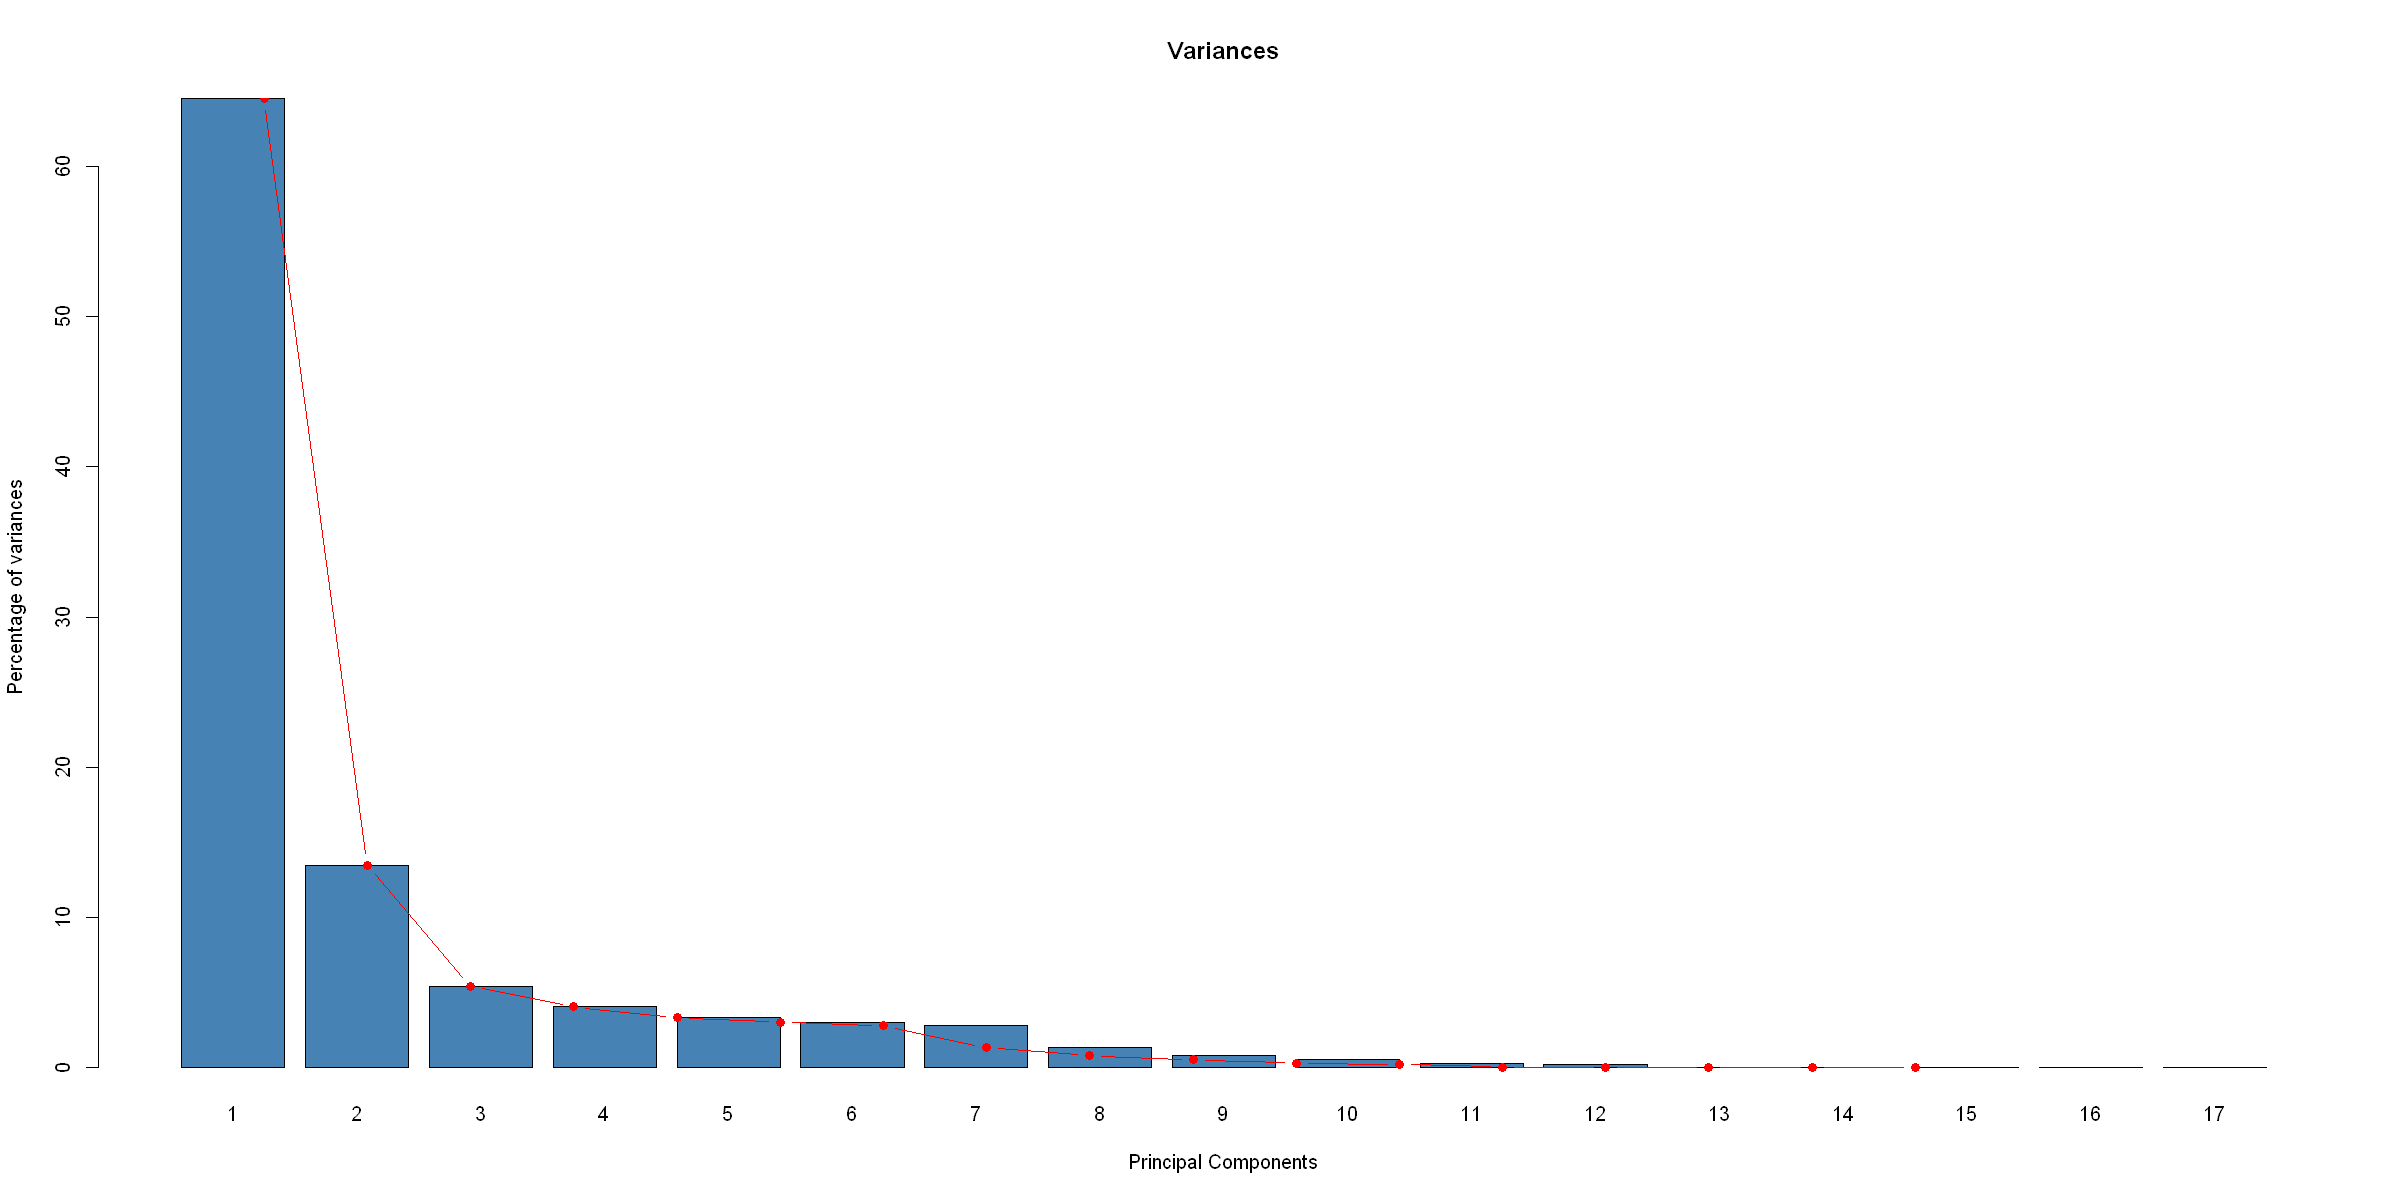

In [32]:
barplot(eig.decathlon2.active[, 2], names.arg=1:nrow(eig.decathlon2.active), 
       main = "Variances",
       xlab = "Principal Components",
       ylab = "Percentage of variances",
       col ="steelblue")
# Add connected line segments to the plot
lines(x = 1:nrow(eig.decathlon2.active), 
      eig.decathlon2.active[, 2], 
      type="b", pch=19, col = "red")

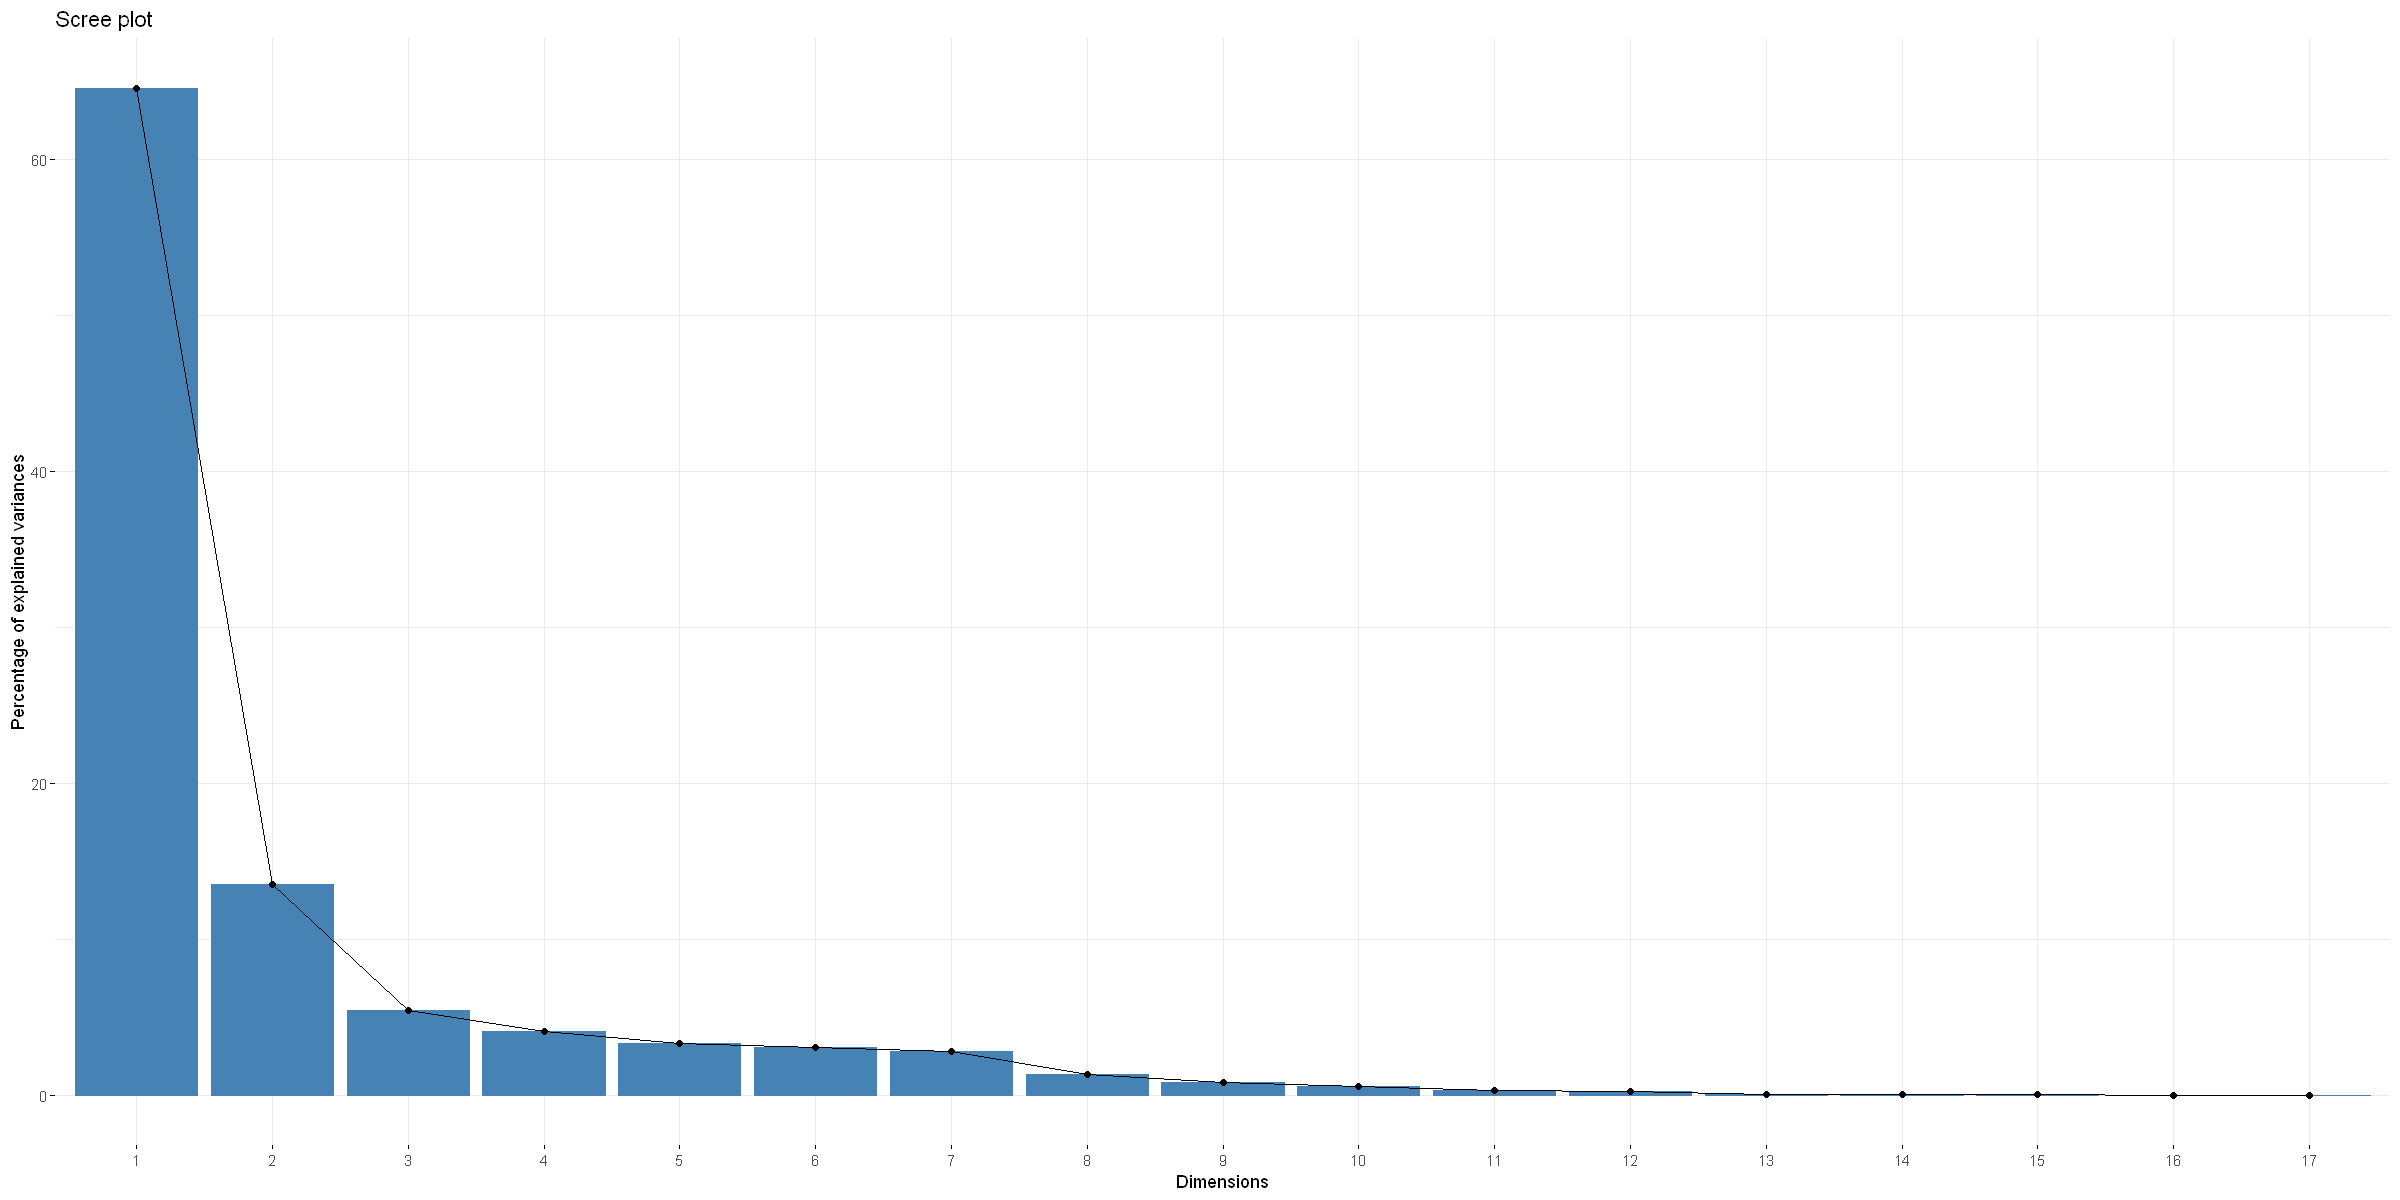

In [33]:
fviz_screeplot(res.pca, ncp=54)

In [34]:
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [35]:
var$coord


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12,Dim.13,Dim.14,Dim.15,Dim.16,Dim.17
PAPI_L1_DCM,0.9312041,-0.23662405,-0.22276806,0.04217189,-0.0194715606,0.05750201,-0.076864806,0.04719969,-0.020807398,-0.037618490,0.0053237033,-0.0761532252,0.0770547343,5.191428e-03,-1.475105e-03,1.259268e-04,-2.443534e-05
PAPI_L3_TCM,0.8454162,-0.32641477,-0.03563999,-0.11962455,0.2667361503,-0.05219089,0.009712371,-0.07095595,0.282310317,-0.042663583,0.0076438833,-0.0475457853,-0.0169227337,-3.285510e-03,2.827690e-03,-7.507464e-06,-2.372523e-05
PAPI_TOT_INS,0.8795822,0.44194634,0.01520805,0.04905856,-0.0006621202,-0.09492073,0.053859579,-0.06466237,-0.028664952,0.097768367,0.0189403208,-0.0124377934,0.0133946054,-3.117193e-02,1.559762e-02,8.733600e-05,-1.426929e-05
PAPI_REF_CYC,0.8544174,-0.25047012,-0.05067422,-0.26639391,0.3102124840,-0.04045835,0.105175104,0.05358754,-0.039420109,-0.028867943,-0.0159992556,0.1366020157,0.0243341717,-2.071162e-03,3.613864e-04,5.315272e-05,2.412479e-05
PAPI_L2_LDM,0.7993244,-0.40632720,-0.06898729,0.16037570,-0.0744112852,-0.21554828,-0.333817856,-0.01034253,-0.024538142,0.018961072,0.0007140786,0.0208984675,-0.0127614333,-1.197470e-02,-1.426011e-02,-7.155477e-03,4.503930e-05
PAPI_SR_INS,0.9149021,0.28853650,0.08818642,0.08554797,-0.0570284201,-0.05103715,0.059893337,0.12832186,0.035891235,0.023670159,0.1903683394,0.0217165720,-0.0041644929,1.050636e-02,-2.640828e-03,-5.074717e-05,-1.442865e-06
PAPI_BR_UCN,0.6140778,0.03902019,0.16201266,-0.63690066,-0.4093080842,0.04655768,-0.129955322,-0.05125586,0.015828421,-0.003501985,0.0035876238,-0.0018080493,-0.0003515955,8.274923e-05,8.486549e-05,-1.859134e-06,2.014117e-05
PAPI_BR_CN,0.9124761,0.29746605,0.13458767,0.07349457,-0.0768983070,-0.06370677,0.080144746,0.16182858,0.053662377,0.049460799,-0.0861069632,-0.0002947573,-0.0022714645,5.401451e-03,-3.327140e-03,-7.969891e-05,-4.055582e-03
PAPI_BR_TKN,0.9119385,0.29861562,0.13328459,0.07887970,-0.0763790929,-0.06170859,0.080205373,0.16151698,0.056224340,0.049342069,-0.0859694276,-0.0014343900,-0.0018427736,5.538742e-03,-2.934687e-03,5.748718e-05,4.055186e-03
PAPI_BR_MSP,0.8527121,-0.20148650,0.18504938,-0.19947361,0.3112380550,0.05353630,-0.004236896,0.11540395,-0.191133057,-0.003901656,0.0062006329,-0.0866866165,-0.0328757789,3.557531e-05,2.866790e-04,-6.429777e-05,1.619294e-05


Loading required package: plyr
Loading required package: scales
Loading required package: grid


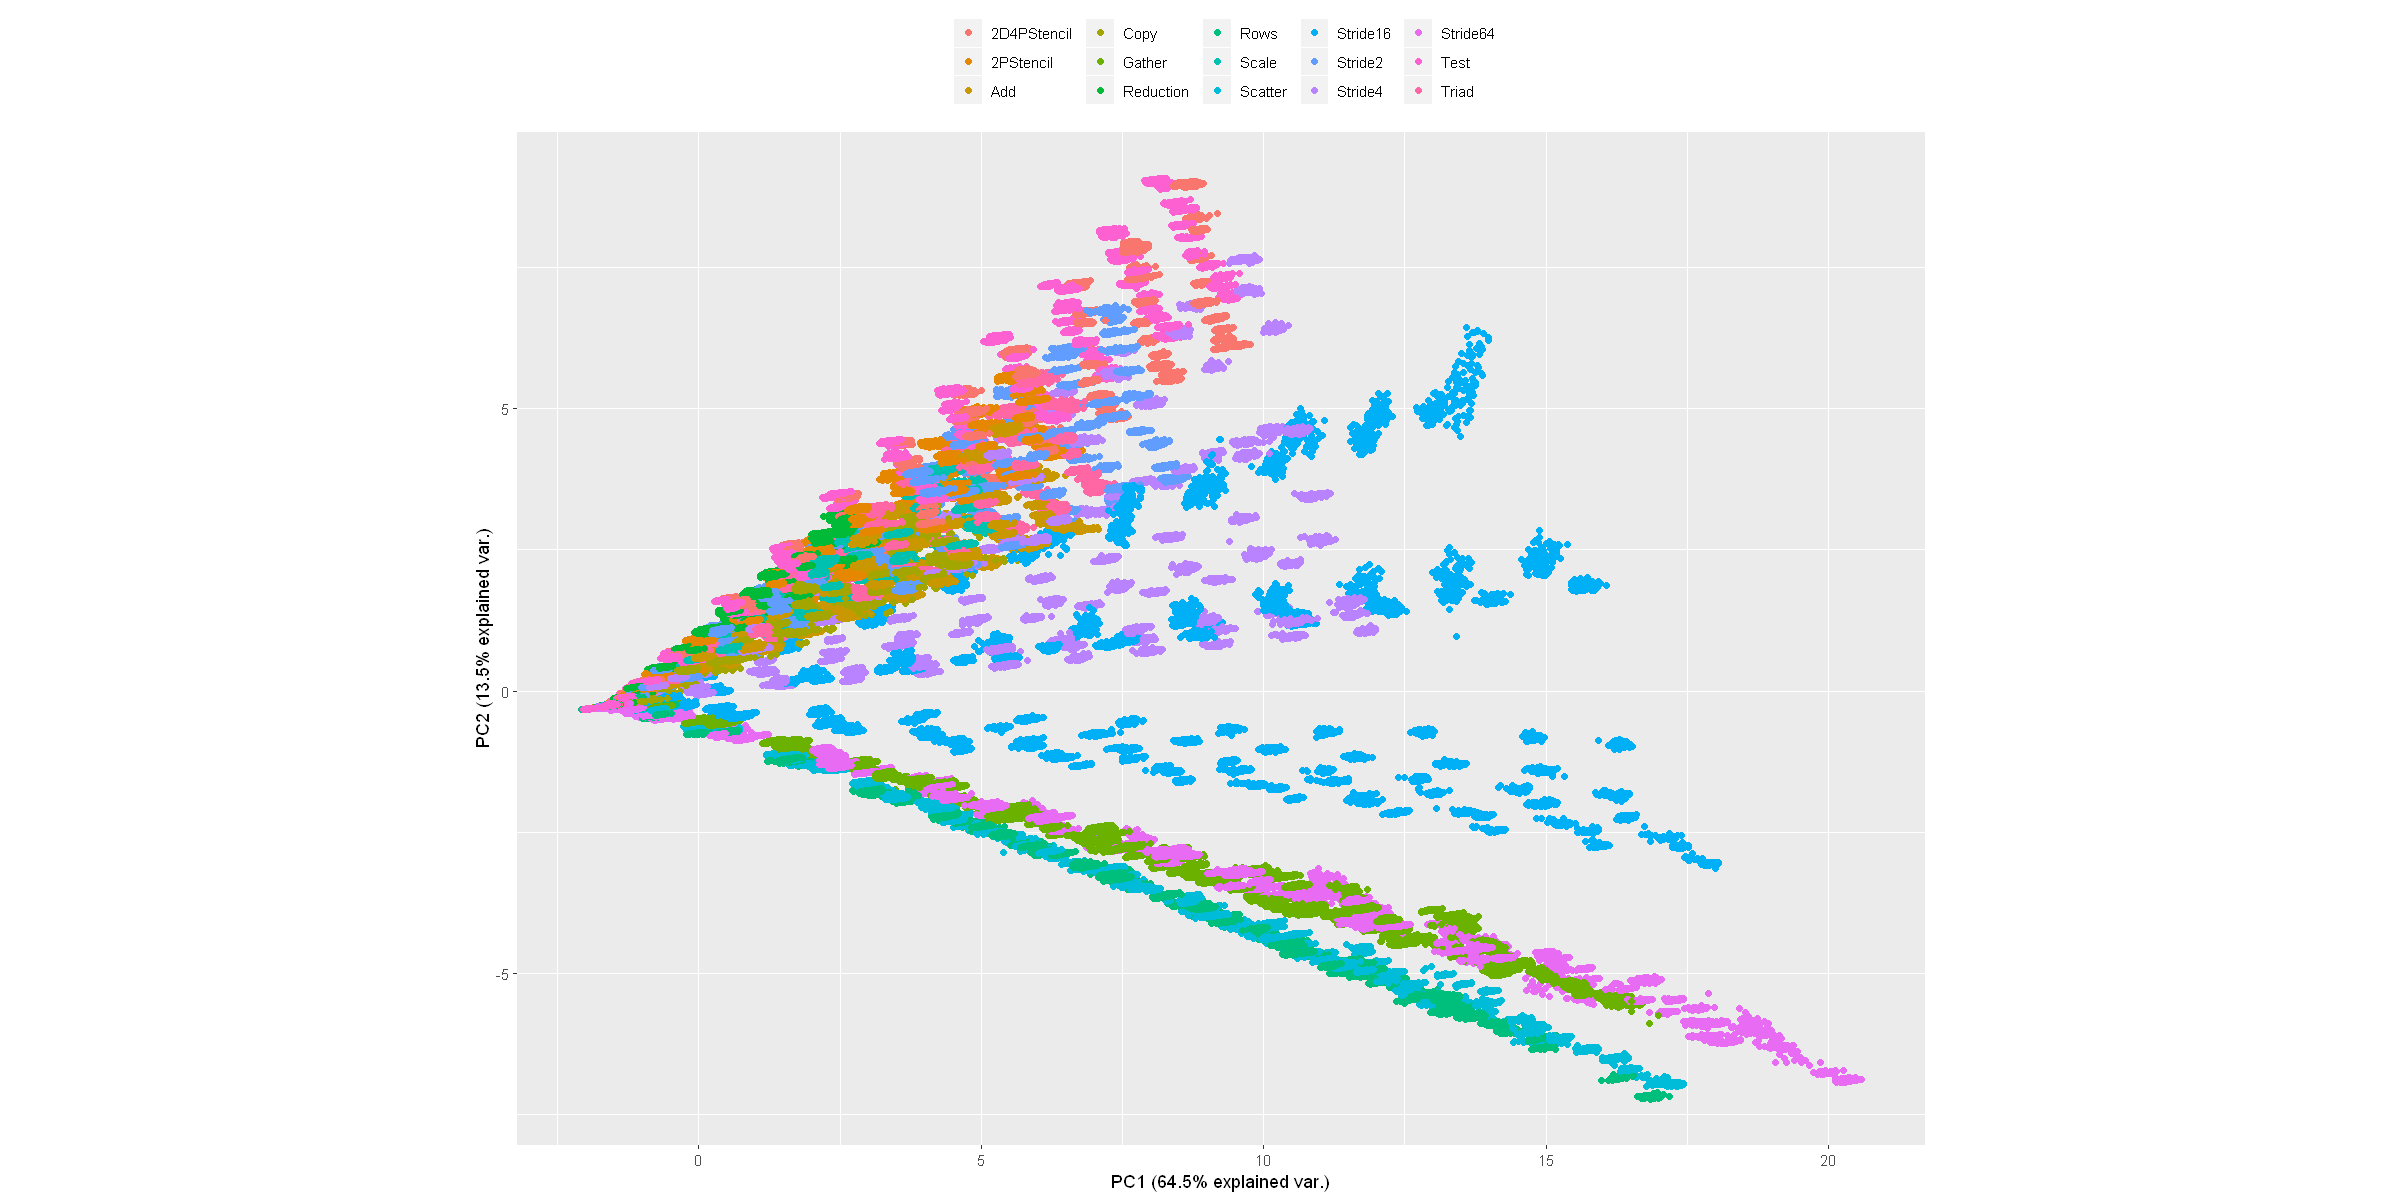

In [36]:
library(devtools)
library(ggbiplot)
g <- ggbiplot(res.pca, obs.scale = 1, var.scale = 1, groups = res.label, ellipse = FALSE, circle = TRUE, var.axes=FALSE)
#g <- ggbiplot(res.pca, obs.scale = 1, var.scale = 1, groups = {res.label, res.threads}, ellipse = FALSE, circle = TRUE, var.axes=FALSE)
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal', legend.position = 'top')
print(g)

In [37]:
# Helper function : 
# Correlation between variables and principal components
var_cor_func <- function(var.loadings, comp.sdev){
  var.loadings*comp.sdev
  }

# Variable correlation/coordinates
loadings <- res.pca$rotation
sdev <- res.pca$sdev

var.coord <- var.cor <- t(apply(loadings, 1, var_cor_func, sdev))
print(var.coord[, 1:4])

                   PC1         PC2         PC3         PC4
PAPI_L1_DCM  0.9312041 -0.23662405 -0.22276806  0.04217189
PAPI_L3_TCM  0.8454162 -0.32641477 -0.03563999 -0.11962455
PAPI_TOT_INS 0.8795822  0.44194634  0.01520805  0.04905856
PAPI_REF_CYC 0.8544174 -0.25047012 -0.05067422 -0.26639391
PAPI_L2_LDM  0.7993244 -0.40632720 -0.06898729  0.16037570
PAPI_SR_INS  0.9149021  0.28853650  0.08818642  0.08554797
PAPI_BR_UCN  0.6140778  0.03902019  0.16201266 -0.63690066
PAPI_BR_CN   0.9124761  0.29746605  0.13458767  0.07349457
PAPI_BR_TKN  0.9119385  0.29861562  0.13328459  0.07887970
PAPI_BR_MSP  0.8527121 -0.20148650  0.18504938 -0.19947361
PAPI_FP_OPS  0.6741563  0.58791309 -0.24808888 -0.08369808
PAPI_L1_LDM  0.8780384 -0.22826149 -0.11804434  0.16971723
PAPI_L1_STM  0.8279740 -0.33861789 -0.28092857  0.07820098
PAPI_LD_INS  0.7831192  0.42152422  0.29370669  0.15637230
PAPI_L2_STM  0.7674274 -0.44722967 -0.25335437  0.08058991
PAPI_TLB_DM  0.5047950 -0.42927564  0.63762665  0.188733

In [38]:
var.cos2 <- var.coord^2
print(var.cos2)

                   PC1         PC2          PC3         PC4          PC5
PAPI_L1_DCM  0.8671410 0.055990942 0.0496256100 0.001778468 3.791417e-04
PAPI_L3_TCM  0.7147285 0.106546600 0.0012702088 0.014310032 7.114817e-02
PAPI_TOT_INS 0.7736648 0.195316565 0.0002312847 0.002406743 4.384032e-07
PAPI_REF_CYC 0.7300291 0.062735280 0.0025678766 0.070965715 9.623179e-02
PAPI_L2_LDM  0.6389195 0.165101797 0.0047592464 0.025720364 5.537039e-03
PAPI_SR_INS  0.8370458 0.083253314 0.0077768442 0.007318455 3.252241e-03
PAPI_BR_UCN  0.3770915 0.001522576 0.0262481026 0.405642450 1.675331e-01
PAPI_BR_CN   0.8326127 0.088486053 0.0181138403 0.005401452 5.913350e-03
PAPI_BR_TKN  0.8316318 0.089171286 0.0177647815 0.006222007 5.833766e-03
PAPI_BR_MSP  0.7271179 0.040596812 0.0342432745 0.039789722 9.686913e-02
PAPI_FP_OPS  0.4544868 0.345641802 0.0615480930 0.007005369 2.780826e-02
PAPI_L1_LDM  0.7709515 0.052103308 0.0139344672 0.028803937 3.696337e-03
PAPI_L1_STM  0.6855410 0.114662077 0.0789208638 0.0

In [39]:
comp.cos2 <- apply(var.cos2, 2, sum)

contrib <- function(var.cos2, comp.cos2){var.cos2*100/comp.cos2}

var.contrib <- t(apply(var.cos2,1, contrib, comp.cos2))
print(var.contrib)

                  PC1         PC2         PC3        PC4          PC5
PAPI_L1_DCM  7.904792  2.43880240  5.38515123  0.2576093 6.687996e-02
PAPI_L3_TCM  6.515411  4.64085966  0.13783743  2.0727936 1.255042e+01
PAPI_TOT_INS 7.052670  8.50742085  0.02509799  0.3486142 7.733359e-05
PAPI_REF_CYC 6.654890  2.73256612  0.27865458 10.2793117 1.697513e+01
PAPI_L2_LDM  5.824342  7.19135352  0.51645233  3.7255685 9.767245e-01
PAPI_SR_INS  7.630446  3.62627196  0.84390866  1.0600707 5.736898e-01
PAPI_BR_UCN  3.437538  0.06631896  2.84832775 58.7568961 2.955256e+01
PAPI_BR_CN   7.590035  3.85419480  1.96563365  0.7823949 1.043105e+00
PAPI_BR_TKN  7.581093  3.88404156  1.92775535  0.9012514 1.029067e+00
PAPI_BR_MSP  6.628352  1.76827891  3.71592836  5.7635007 1.708755e+01
PAPI_FP_OPS  4.143067 15.05515042  6.67892623  1.0147205 4.905330e+00
PAPI_L1_LDM  7.027936  2.26946837  1.51210662  4.1722209 6.520276e-01
PAPI_L1_STM  6.249340  4.99434621  8.56414232  0.8858086 5.331746e+00
PAPI_LD_INS  5.59057

In [40]:
print(sort(var.contrib[,'PC1'],decreasing=TRUE))

 PAPI_L1_DCM  PAPI_SR_INS   PAPI_BR_CN  PAPI_BR_TKN PAPI_TOT_INS  PAPI_L1_LDM 
    7.904792     7.630446     7.590035     7.581093     7.052670     7.027936 
PAPI_REF_CYC  PAPI_BR_MSP  PAPI_L3_TCM  PAPI_L1_STM  PAPI_L2_LDM  PAPI_LD_INS 
    6.654890     6.628352     6.515411     6.249340     5.824342     5.590575 
 PAPI_L2_STM  PAPI_FP_OPS  PAPI_BR_UCN  PAPI_L2_DCH  PAPI_TLB_DM 
    5.368777     4.143067     3.437538     2.477835     2.322901 


In [41]:
print(sort(var.contrib[,'PC2'],decreasing=TRUE))

 PAPI_FP_OPS  PAPI_L2_DCH  PAPI_L2_STM PAPI_TOT_INS  PAPI_TLB_DM  PAPI_LD_INS 
 15.05515042  14.49294815   8.71204405   8.50742085   8.02659455   7.73933952 
 PAPI_L2_LDM  PAPI_L1_STM  PAPI_L3_TCM  PAPI_BR_TKN   PAPI_BR_CN  PAPI_SR_INS 
  7.19135352   4.99434621   4.64085966   3.88404156   3.85419480   3.62627196 
PAPI_REF_CYC  PAPI_L1_DCM  PAPI_L1_LDM  PAPI_BR_MSP  PAPI_BR_UCN 
  2.73256612   2.43880240   2.26946837   1.76827891   0.06631896 


In [42]:
print(sort(var.contrib[,'PC3'],decreasing=TRUE))

 PAPI_TLB_DM  PAPI_LD_INS  PAPI_L1_STM  PAPI_L2_STM  PAPI_FP_OPS  PAPI_L1_DCM 
 44.11893019   9.36094571   8.56414232   6.96544445   6.67892623   5.38515123 
 PAPI_L2_DCH  PAPI_BR_MSP  PAPI_BR_UCN   PAPI_BR_CN  PAPI_BR_TKN  PAPI_L1_LDM 
  5.15475715   3.71592836   2.84832775   1.96563365   1.92775535   1.51210662 
 PAPI_SR_INS  PAPI_L2_LDM PAPI_REF_CYC  PAPI_L3_TCM PAPI_TOT_INS 
  0.84390866   0.51645233   0.27865458   0.13783743   0.02509799 


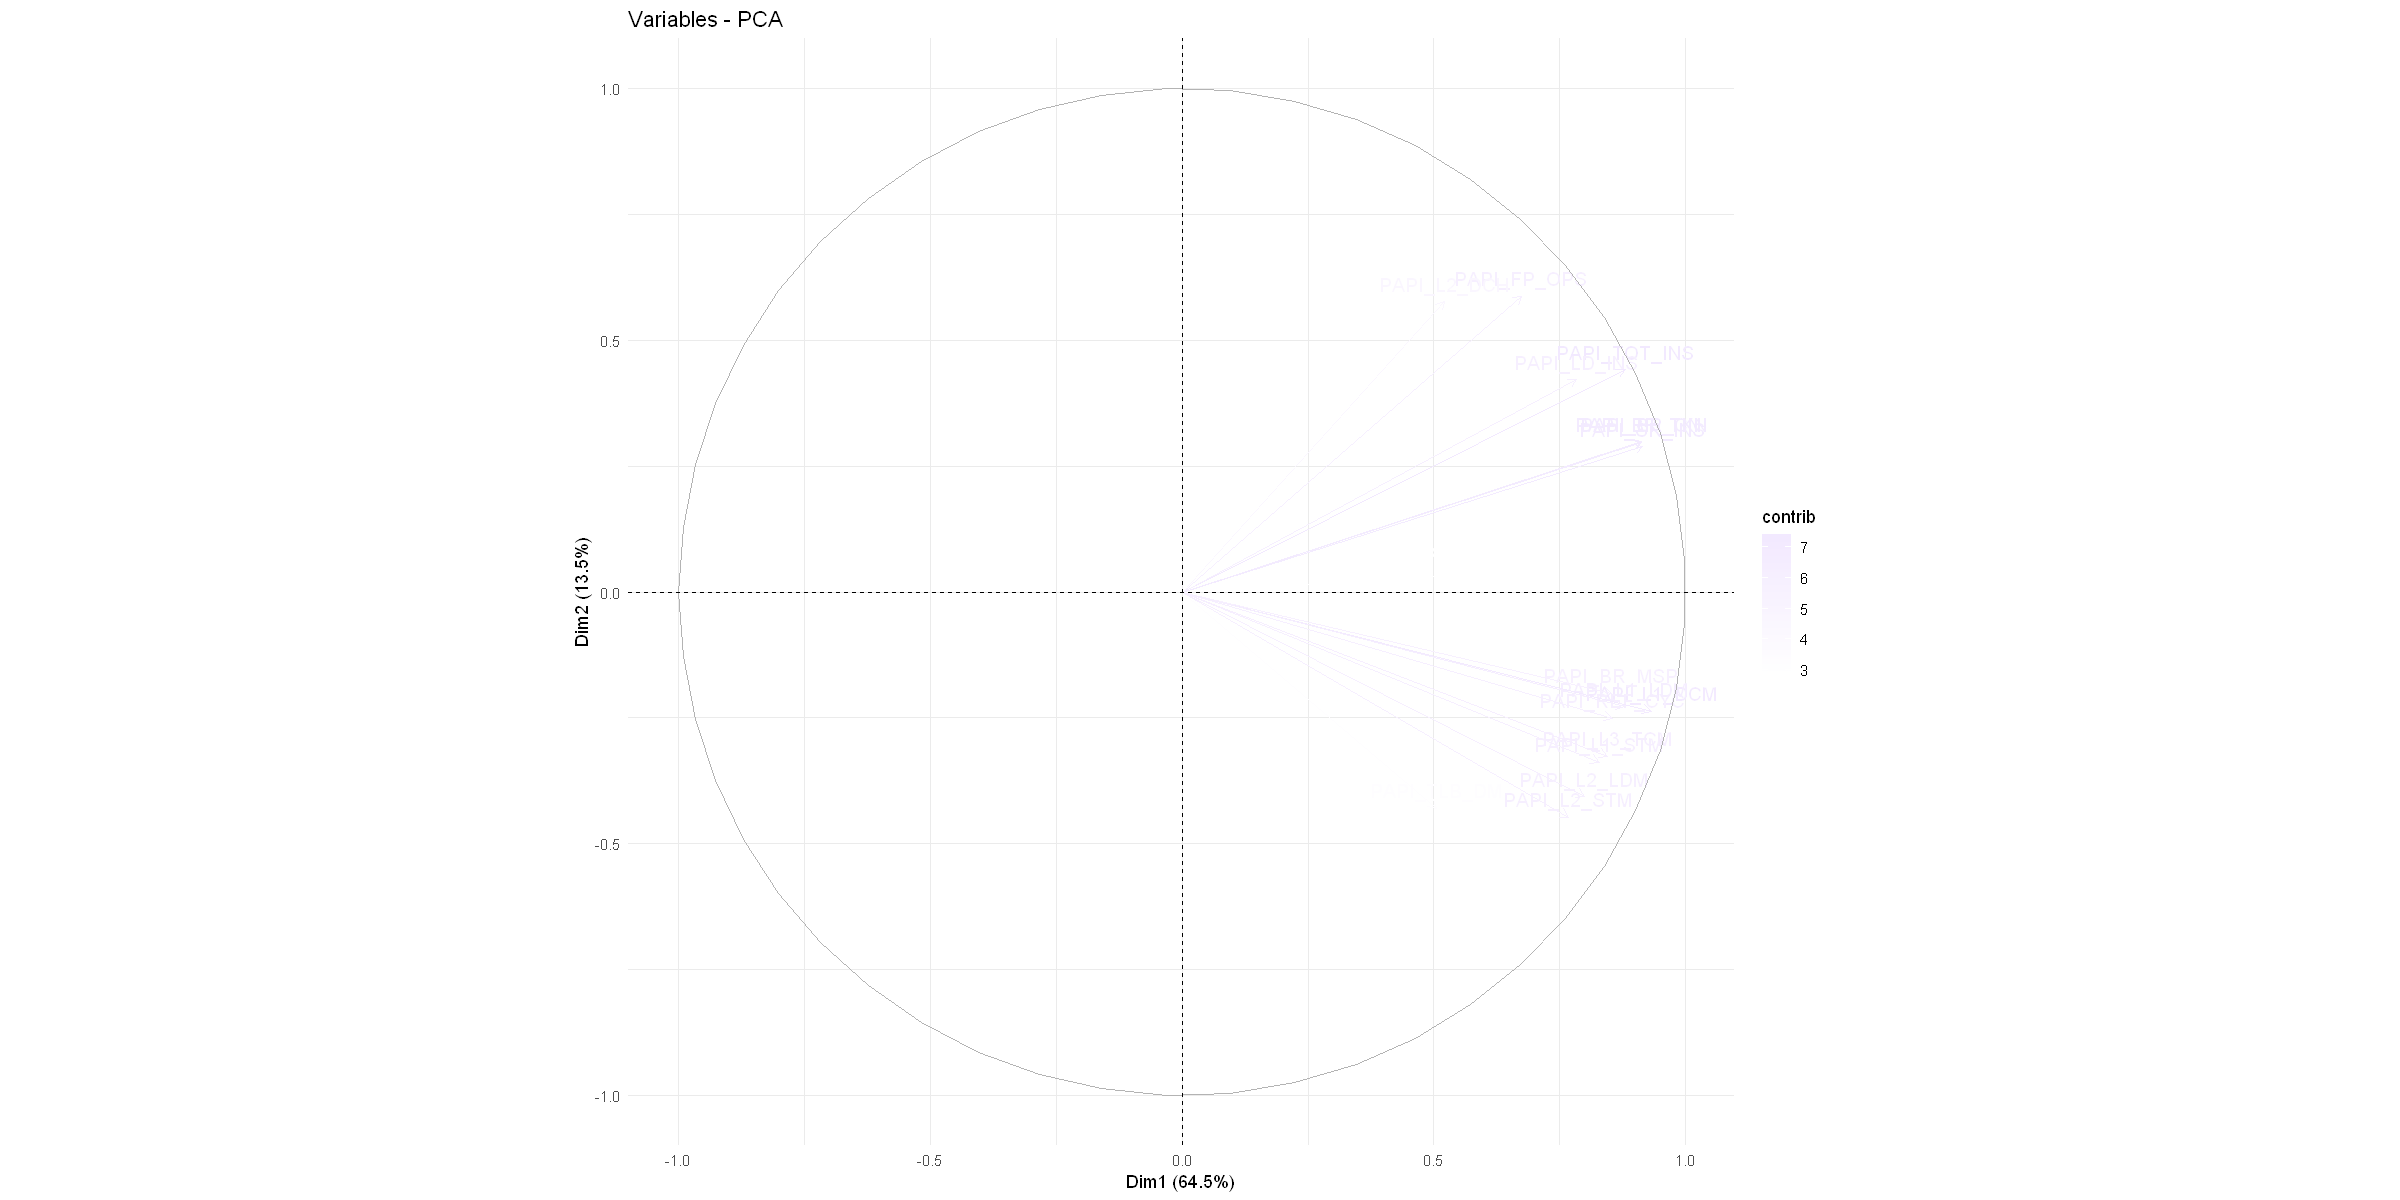

In [43]:
fviz_pca_var(res.pca, col.var="contrib") + scale_color_gradient2(low="white", mid="blue", high="red", midpoint=50) + theme_minimal()

In [44]:
new_mydata1 = mydata[,5:61]
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TOT_CYC))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_DM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_FP_INS))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_INS))

new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_TCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_IM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_RES_STL))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_PRC))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_MSP))




new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_DP))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_SP))

my_data_ordered1 <- new_mydata1[,order(colnames(new_mydata1))]


options(repr.matrix.max.rows = 100)
options(repr.matrix.max.cols = 100)
res1 <- cor(my_data_ordered1)
dim(res1)
round(res1, 2)

ERROR: Error in `[.data.frame`(mydata, , 5:61): undefined columns selected


In [ ]:
library(corrplot)


corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "AOE", number.cex = 0.5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=2)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=3)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=4)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=6)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=7)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=8)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=9)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=10)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=11)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=12)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=13)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=14)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=15)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=16)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=17)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "FPC", number.cex = 0.5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "alphabet", number.cex = 0.5)